In [2]:
import requests
import bs4
from bs4 import BeautifulSoup
from bs4 import diagnose
import pandas as pd
import time
import re
from datetime import datetime

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as expected

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(color_codes=True) #overide maplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [13, 8] #default figure size

In [3]:
html = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>First HTML Page</title>
</head>
<body>
  <div id="first">
    <h3 data-example="yes">hi</h3>
    <p>more text.</p>
  </div>
  <ol><li class="special">This list item is special.</li>
  <li class="special">This list item is also special.</li>
  <li>This list item is not special.</li>
  </ol>
  <div data-example="yes">bye</div>
</body>
</html>
"""

In [4]:
URL = 'https://www.indeed.com/jobs?q=data+scientist&l=california&sort=date'

#conducting a request of the stated URL above:
page = requests.get(URL)

#specifying a desired format of “page” using the html parser - 
#this allows python to read the various components of the page, rather than treating it as one long string.
soup = BeautifulSoup(page.text, 'html.parser')

#printing soup in a more structured tree format that makes for easier reading
#print(soup.prettify())

## <b>Web Scraping Code</b>

In [31]:
filename = 'US Indeed - Entry Level Data Scientist - California.csv'
data = []
URL1 = 'http://www.indeed.com'
results_number = soup.find("div", attrs = {"id": "searchCountPages"}).text
total_jobs = int(results_number.split(sep = ' ')[-2].replace(',', ''))
for pagenum in range(0,total_jobs, 10): #for loop, iterating over the pages
    web = 'https://www.indeed.com/jobs?q=data%20scientist&l=california'+'&explvl=entry_level'+'&sort=date'+'&start='+str(pagenum)
    subpage = requests.get(web)
    soup = BeautifulSoup(subpage.text, 'html.parser')

    for (i,j) in zip((soup.find_all(class_='row')),range(len(soup.find_all(class_='row'))+1)): #for loop, iterating over jobs

        try:
            job_title= i.find(class_="title").text.strip('\n')
        except:
            job_title= np.nan
        try:
            company = i.find(class_="company").text.strip('\n')
        except:
            company = np.nan
        try:
            location = i.find(class_='location').text.strip('\n')
        except:
            location = np.nan
#         try:
#             salary = i.find('nobr').text
#         except:
#             try:
#                 div_two = i.find(name='div', attrs={'class':'sjcl'})
#                 div_three = i.find('div')
#                 salary = div_three.text.strip().replace('\n','')
#             except:
#                 salary = np.nan
        try:
            date = i.find('span', {'class':'date'}).text.strip('\n')
        except:
            date = np.nan

#             if (job_title):
#                 print(job_title)

#             if (company):
#                 print(company)

#             if(location):
#                 print(location)
            
#             if (date):
#                 print(date)

            #To get the job description
        job_page = soup.find_all(class_='jobtitle turnstileLink')[j]['href']
        job_page = URL1 + job_page
        if job_page:
            subhtml = requests.get(job_page)
            subSoup = BeautifulSoup(subhtml.text,'html.parser')
            job_desc = subSoup.find('div', attrs = {'id':'jobDescriptionText'}).text.replace('\n',' ')
            try:
                num_reviews = subSoup.find(class_='icl-Ratings-count').text
            except:
                num_reviews = '0'
#             print(job_desc)

        data.append((job_title, company, location, date, num_reviews, job_desc, job_page))
    
import pandas as pd
df = pd.DataFrame(data, columns=['Job Title', 'Company', 'Location', 'Date Posted', 'Reviews', 'Job Description', 'Job URL'])
df.to_csv(filename, index = False, encoding='utf-8')

ConnectionError: ('Connection aborted.', OSError("(10060, 'WSAETIMEDOUT')"))

## <b>Creating Dataframe</b>

In [3]:
indeed = pd.read_csv('US Indeed - Entry Level Data Scientist - California.csv')
indeed

,Job Title,Company,Location,Salary,Date Posted,Reviews,Job Description,Job URL
0,Intern: Business Analyst,Equinix,"Sunnyvale, CA","Equinix3.8Sunnyvale, CA",Just posted,217 reviews,Intern: Business Analyst About Equinix At Equi...,http://www.indeed.com/rc/clk?jk=c5013cbea3d4f9...
1,Marketing Intern – Content Creation and Data A...,Precision Property Measurements,"Long Beach, CA 90804 (Traffic Circle area)","Precision Property MeasurementsLong Beach, CA ...",Just posted,0,Part time and flexible – 3 months minimum up t...,http://www.indeed.com/company/Precision-Proper...
2,"Intern, Real Estate Financial Analyst","Enterprise Community Investment, Inc.","Los Angeles, CA","Enterprise Community Investment, Inc.3.8Los An...",Just posted,30 reviews,Department Enterprise Housing Credit Investmen...,http://www.indeed.com/rc/clk?jk=91119b67062ca1...
3,"Data Scientist, FEAR",Apple,"Santa Clara Valley, CA 95014","Apple4.2Santa Clara Valley, CA 95014",Today,"9,548 reviews","Summary Posted: Apr 21, 2020 Role Number:20016...",http://www.indeed.com/rc/clk?jk=1d7a19fbe7553d...
4,"Data Scientist, Networking",Bytedance,"Mountain View, CA","BytedanceMountain View, CA",Today,0,Responsibilities We are looking for candidates...,http://www.indeed.com/rc/clk?jk=53c525d80a4dd7...
...,...,...,...,...,...,...,...,...
704,Deep Learning Research Scientist / Engineer (D...,"Samsung Semiconductor, Inc.","San Diego, CA 92121 (Sorrento Valley area)","Samsung Semiconductor, Inc.4.0San Diego, CA 92...",30+ days ago,"7,916 reviews",JOB TITLE Research Engineer-Deep Learning Theo...,http://www.indeed.com/rc/clk?jk=23e25a834f2e2e...
705,Machine Learning Engineer – Reinforcement Lear...,Inzone,"Palo Alto, CA","Inzone3.3Palo Alto, CA",30+ days ago,3 reviews,Machine Learning Engineer / Architect – Reinfo...,http://www.indeed.com/rc/clk?jk=d532cae24dc6da...
706,Performance Engineer,Apple,"Santa Clara Valley, CA 95014","Apple4.2Santa Clara Valley, CA 95014",30+ days ago,"9,548 reviews","Summary Posted: Jun 6, 2019 Role Number:200000...",http://www.indeed.com/rc/clk?jk=d949f10e2cf048...
707,ML and NLP Consultant,New Idea Engineering,"San Francisco Bay Area, CA","New Idea EngineeringSan Francisco Bay Area, CA",30+ days ago,0,Position: ML and NLP Consultant Location: San...,http://www.indeed.com/rc/clk?jk=f9dd011e68ee79...


## <b>Cleaning</b>

In [4]:
#Clean Reviews
def clean_reviews(reviews):
    return re.findall('(\d+.\d+)', reviews)

indeed['Reviews'] = indeed['Reviews'].apply(clean_reviews)
indeed['Reviews'] = indeed['Reviews'].str[0]

### Replacing NaN with 0 for the Reviews column

In [5]:
indeed['Reviews'] = indeed.Reviews.fillna(0)

In [6]:
indeed['Reviews']

0        217
1          0
2          0
3      9,548
4          0
       ...  
704    7,916
705        0
706    9,548
707        0
708        0
Name: Reviews, Length: 709, dtype: object

In [7]:
indeed

,Job Title,Company,Location,Salary,Date Posted,Reviews,Job Description,Job URL
0,Intern: Business Analyst,Equinix,"Sunnyvale, CA","Equinix3.8Sunnyvale, CA",Just posted,217,Intern: Business Analyst About Equinix At Equi...,http://www.indeed.com/rc/clk?jk=c5013cbea3d4f9...
1,Marketing Intern – Content Creation and Data A...,Precision Property Measurements,"Long Beach, CA 90804 (Traffic Circle area)","Precision Property MeasurementsLong Beach, CA ...",Just posted,0,Part time and flexible – 3 months minimum up t...,http://www.indeed.com/company/Precision-Proper...
2,"Intern, Real Estate Financial Analyst","Enterprise Community Investment, Inc.","Los Angeles, CA","Enterprise Community Investment, Inc.3.8Los An...",Just posted,0,Department Enterprise Housing Credit Investmen...,http://www.indeed.com/rc/clk?jk=91119b67062ca1...
3,"Data Scientist, FEAR",Apple,"Santa Clara Valley, CA 95014","Apple4.2Santa Clara Valley, CA 95014",Today,"9,548","Summary Posted: Apr 21, 2020 Role Number:20016...",http://www.indeed.com/rc/clk?jk=1d7a19fbe7553d...
4,"Data Scientist, Networking",Bytedance,"Mountain View, CA","BytedanceMountain View, CA",Today,0,Responsibilities We are looking for candidates...,http://www.indeed.com/rc/clk?jk=53c525d80a4dd7...
...,...,...,...,...,...,...,...,...
704,Deep Learning Research Scientist / Engineer (D...,"Samsung Semiconductor, Inc.","San Diego, CA 92121 (Sorrento Valley area)","Samsung Semiconductor, Inc.4.0San Diego, CA 92...",30+ days ago,"7,916",JOB TITLE Research Engineer-Deep Learning Theo...,http://www.indeed.com/rc/clk?jk=23e25a834f2e2e...
705,Machine Learning Engineer – Reinforcement Lear...,Inzone,"Palo Alto, CA","Inzone3.3Palo Alto, CA",30+ days ago,0,Machine Learning Engineer / Architect – Reinfo...,http://www.indeed.com/rc/clk?jk=d532cae24dc6da...
706,Performance Engineer,Apple,"Santa Clara Valley, CA 95014","Apple4.2Santa Clara Valley, CA 95014",30+ days ago,"9,548","Summary Posted: Jun 6, 2019 Role Number:200000...",http://www.indeed.com/rc/clk?jk=d949f10e2cf048...
707,ML and NLP Consultant,New Idea Engineering,"San Francisco Bay Area, CA","New Idea EngineeringSan Francisco Bay Area, CA",30+ days ago,0,Position: ML and NLP Consultant Location: San...,http://www.indeed.com/rc/clk?jk=f9dd011e68ee79...


In [8]:
indeed.drop_duplicates()
indeed.shape

(709, 8)

In [9]:
company_freq = pd.DataFrame(indeed['Company'].value_counts())

In [10]:
company_freq.head(20)

,Company
Apple,117
Waymo,24
Baidu USA,23
"Samsung Semiconductor, Inc.",21
Inzone,20
Zeevo Group,20
"Farmer's Business Network, Inc.",20
SigOpt,20
New Idea Engineering,20
Synapse Financial Technologies Inc,20


In [11]:
indeed.describe()

,Job Title,Company,Location,Salary,Date Posted,Reviews,Job Description,Job URL
count,709,709,709,709,709,709,709,709
unique,345,271,148,286,28,79,420,421
top,Data Scientist,Apple,"Santa Clara Valley, CA 95014","Apple4.2Santa Clara Valley, CA 95014",30+ days ago,0,Experiment engineers will be expected to help ...,http://www.indeed.com/rc/clk?jk=bf43504d190828...
freq,78,117,117,117,614,428,20,20


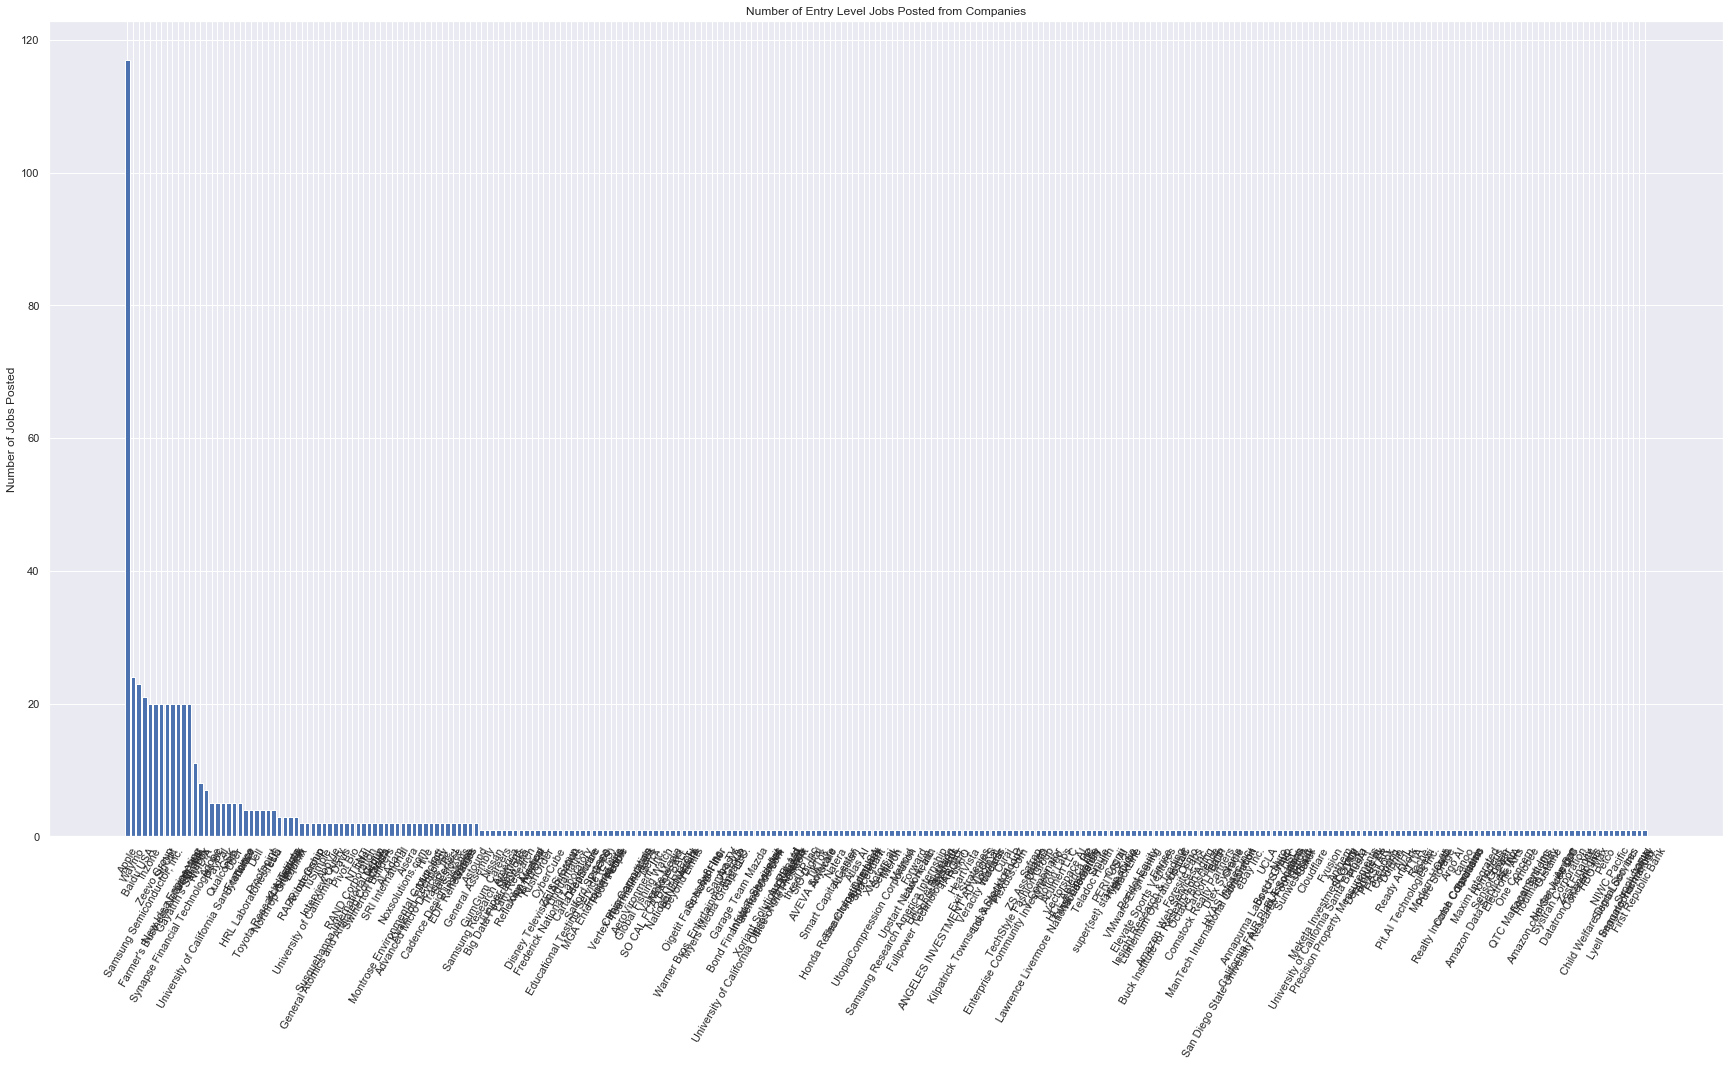

In [12]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=60)
plt.title('Number of Entry Level Jobs Posted from Companies')
plt.ylabel('Number of Jobs Posted')
plt.bar(company_freq.index,company_freq['Company'])
plt.savefig('num_jobs_company', dpi=300, bbox_inches = 'tight')

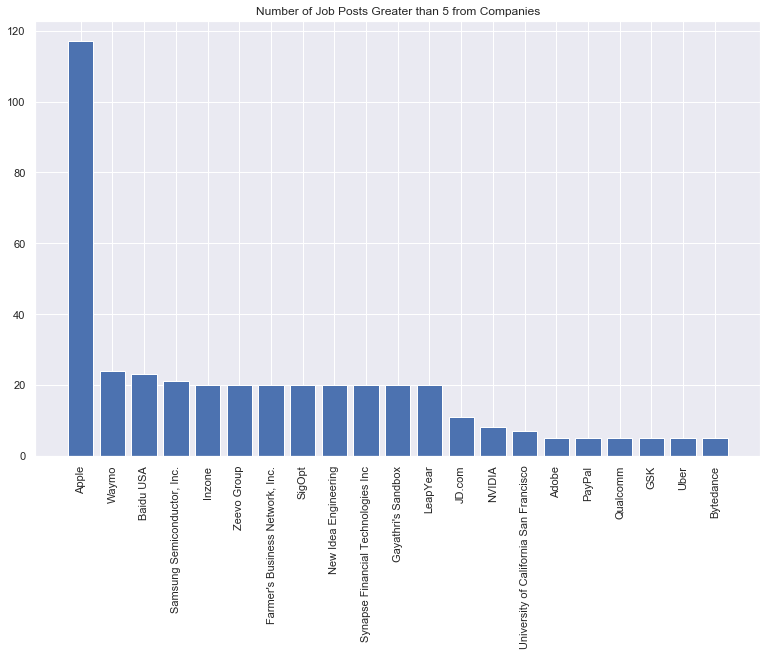

In [13]:
greater_5 = company_freq['Company'][company_freq['Company'] >= 5 ]
greater_5_df = pd.DataFrame(greater_5)
plt.xticks(rotation='vertical')
plt.title('Number of Job Posts Greater than 5 from Companies')
plt.bar(greater_5_df.index,greater_5_df['Company'])
plt.savefig('num_jobs_greater5.png', dpi=300, bbox_inches = 'tight')

In [14]:
keywords = ['statistics',
'computer science',
'machine learning',
'degree',
'SQL',
'python',
'experience',
'business intelligence',
'programming',
'finance',
'related fields']

for keyword in keywords:
    indeed[keyword] = indeed['Job Description'].astype(str).str.contains(keyword)

In [15]:
del indeed['Salary']

In [16]:
indeed

,Job Title,Company,Location,Date Posted,Reviews,Job Description,Job URL,statistics,computer science,machine learning,degree,SQL,python,experience,business intelligence,programming,finance,related fields
0,Intern: Business Analyst,Equinix,"Sunnyvale, CA",Just posted,217,Intern: Business Analyst About Equinix At Equi...,http://www.indeed.com/rc/clk?jk=c5013cbea3d4f9...,False,False,False,True,False,False,True,False,False,False,False
1,Marketing Intern – Content Creation and Data A...,Precision Property Measurements,"Long Beach, CA 90804 (Traffic Circle area)",Just posted,0,Part time and flexible – 3 months minimum up t...,http://www.indeed.com/company/Precision-Proper...,False,False,False,True,False,False,True,False,False,False,False
2,"Intern, Real Estate Financial Analyst","Enterprise Community Investment, Inc.","Los Angeles, CA",Just posted,0,Department Enterprise Housing Credit Investmen...,http://www.indeed.com/rc/clk?jk=91119b67062ca1...,False,False,False,False,False,False,True,False,False,True,False
3,"Data Scientist, FEAR",Apple,"Santa Clara Valley, CA 95014",Today,"9,548","Summary Posted: Apr 21, 2020 Role Number:20016...",http://www.indeed.com/rc/clk?jk=1d7a19fbe7553d...,False,False,True,True,True,False,True,False,False,False,False
4,"Data Scientist, Networking",Bytedance,"Mountain View, CA",Today,0,Responsibilities We are looking for candidates...,http://www.indeed.com/rc/clk?jk=53c525d80a4dd7...,True,False,True,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,Deep Learning Research Scientist / Engineer (D...,"Samsung Semiconductor, Inc.","San Diego, CA 92121 (Sorrento Valley area)",30+ days ago,"7,916",JOB TITLE Research Engineer-Deep Learning Theo...,http://www.indeed.com/rc/clk?jk=23e25a834f2e2e...,False,False,True,False,False,False,False,False,False,False,False
705,Machine Learning Engineer – Reinforcement Lear...,Inzone,"Palo Alto, CA",30+ days ago,0,Machine Learning Engineer / Architect – Reinfo...,http://www.indeed.com/rc/clk?jk=d532cae24dc6da...,False,False,True,False,False,True,False,False,False,False,False
706,Performance Engineer,Apple,"Santa Clara Valley, CA 95014",30+ days ago,"9,548","Summary Posted: Jun 6, 2019 Role Number:200000...",http://www.indeed.com/rc/clk?jk=d949f10e2cf048...,False,False,False,False,False,False,True,False,True,False,False
707,ML and NLP Consultant,New Idea Engineering,"San Francisco Bay Area, CA",30+ days ago,0,Position: ML and NLP Consultant Location: San...,http://www.indeed.com/rc/clk?jk=f9dd011e68ee79...,False,False,True,False,False,False,True,False,False,False,False


In [25]:
keyword_dict = {}
for key in keywords:
    keyword_dict[key] = indeed[key].value_counts()
keyword_dict

{'statistics': False    585
 True     124
 Name: statistics, dtype: int64,
 'computer science': False    628
 True      81
 Name: computer science, dtype: int64,
 'machine learning': True     456
 False    253
 Name: machine learning, dtype: int64,
 'degree': False    462
 True     247
 Name: degree, dtype: int64,
 'SQL': False    575
 True     134
 Name: SQL, dtype: int64,
 'python': False    664
 True      45
 Name: python, dtype: int64,
 'experience': True     521
 False    188
 Name: experience, dtype: int64,
 'business intelligence': False    683
 True      26
 Name: business intelligence, dtype: int64,
 'programming': False    502
 True     207
 Name: programming, dtype: int64,
 'finance': False    646
 True      63
 Name: finance, dtype: int64,
 'related fields': False    687
 True      22
 Name: related fields, dtype: int64}

In [26]:
keyword_df = pd.DataFrame(keyword_dict)
keyword_df = keyword_df.T
keyword_df

,False,True
statistics,585,124
computer science,628,81
machine learning,253,456
degree,462,247
SQL,575,134
python,664,45
experience,188,521
business intelligence,683,26
programming,502,207
finance,646,63


In [ ]:
ax_keyword = keyword_df.plot(kind='bar',title='Keyword Frequency')
ax_keyword.set_xlabel('Keyword')
ax_keyword.set_ylabel('Frequency')
plt.savefig('keywordTF.png',dpi=300, bbox_inches = 'tight')

In [23]:
pd.DataFrame(indeed['Date Posted'].value_counts())

,Date Posted
30+ days ago,614
4 days ago,8
19 days ago,6
7 days ago,6
1 day ago,6
14 days ago,6
6 days ago,5
18 days ago,5
5 days ago,5
26 days ago,5


In [22]:
big_company = ['Amazon','Netflix','Facebook','Google']
booleans = {}
for i in big_company:
    booleans[i] = i in indeed['Company']
booleans

{'Amazon': False, 'Netflix': False, 'Facebook': False, 'Google': False}